# Data Analysis and Data Science
## Putting it all together 

By: Caroline Labelle
<br>For: BCM6065-65

<br>
Date: Date: July 6th, 2023

<hr style="border:1px solid black"> </hr>

In [ ]:
### Student Name: BERLIOCCHI

Complete the following exercises and push your Notebook to your GitHum account. You have until July 7th, 5PM to submit your GitHub account URL to StudiUM.

In [68]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

# Breast Cancer Subtypes Analysis [50 pts]

You are given a gene expression dataset of N breast cancer patients with their clinical subtype. You wish to know if you can assess the clinical subtypes based on the gene expression.

## Import the data [10 pts]

Your dataset concist of three files: `genes_id.txt`, `patient_subtype.txt` and `patient_expression.txt`. Import the various files and build your dataset daframe.

In [23]:
### Import the files
genes_id = pd.read_csv('genes_id.txt', header = None, names = ["Genes"])
patient_expression = pd.read_csv('patient_expression.txt', sep=" ", header = None)
patient_subtype = pd.read_csv('patient_subtype.txt', header = None, names = ["patient_subtype"])

In [16]:
patient_expression.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927


In [22]:
patient_subtype.head()

,patient_subtype
0,Basal
1,Basal
2,Basal
3,Basal
4,Basal


In [10]:
### How many patients are you considering?
print(patient_expression.shape[0], "patients")

### How many genes are you considering?
print(genes_id.shape[0], "genes")

645 patients
47 genes


In [18]:
genes_id.head()

,0
0,ENSG00000011426.9
1,ENSG00000054598.6
2,ENSG00000062038.12
3,ENSG00000077152.8
4,ENSG00000082175.13


In [7]:
### Combine the data from all three files into one dataframe
### Clue: you should define columns' names and add a column


genes_id,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,patient_subtypes
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal


In [29]:
genes_id.iloc[:,[0]]

,Genes
0,ENSG00000011426.9
1,ENSG00000054598.6
2,ENSG00000062038.12
3,ENSG00000077152.8
4,ENSG00000082175.13
5,ENSG00000089685.13
6,ENSG00000091831.20
7,ENSG00000092621.10
8,ENSG00000094804.8
9,ENSG00000099953.8


In [41]:
patient_expression.columns = genes_id.iloc[:,0]
patient_expression.head()

Genes,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927


In [36]:
data = patient_expression.join(patient_subtype)
data.head()

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,patient_subtype
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal


## Explore the dataset [20 pts]

In [39]:
### How many subtypes are you considering?
print(data.patient_subtype.nunique(), "subtypes")

5 subtypes


In [40]:
### How many patients are associtated to each subtype?
data.patient_subtype.value_counts()

patient_subtype
Basal     191
LumA      179
LumB      165
Her2       82
Normal     28
Name: count, dtype: int64

In [42]:
patient_expression.head()

Genes,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927


In [43]:
patient_expression.mean()

Genes
ENSG00000011426.9     2.164062
ENSG00000054598.6     1.535686
ENSG00000062038.12    2.102870
ENSG00000077152.8     3.132112
ENSG00000082175.13    1.179845
ENSG00000089685.13    2.554557
ENSG00000091831.20    2.491631
ENSG00000092621.10    2.452480
ENSG00000094804.8     1.803410
ENSG00000099953.8     3.506780
ENSG00000101057.14    2.927418
ENSG00000104332.10    2.226754
ENSG00000105173.12    1.360070
ENSG00000106605.9     3.432338
ENSG00000107262.15    2.479991
ENSG00000115648.12    2.966889
ENSG00000117399.12    2.978518
ENSG00000117724.11    2.402607
ENSG00000128422.14    2.524521
ENSG00000129514.5     3.439974
ENSG00000133627.16    1.146421
ENSG00000134057.13    3.088703
ENSG00000135679.20    2.056612
ENSG00000136997.13    3.338576
ENSG00000138180.14    2.161510
ENSG00000141424.11    4.854191
ENSG00000141736.12    3.646903
ENSG00000141738.12    2.391021
ENSG00000142945.11    2.190188
ENSG00000146648.14    1.253302
ENSG00000148773.11    2.236166
ENSG00000151715.6     1.273940
EN

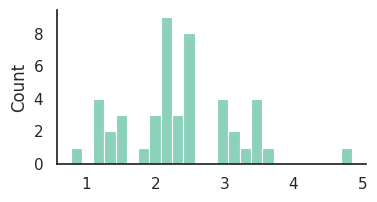

In [45]:
### Generate a graph of the average expression of each gene.
#average_gene = patient_expression.mean()

sns.histplot(data, x=patient_expression.mean(), bins=25)
sns.despine()

In [55]:
### What are the two genes with the largest standard deviation for all patient
std = patient_expression.iloc[:, 0:46].std()

genes_largest = std.sort_values(ascending=False)
genes_largest.head(2)

Genes
ENSG00000186081.10    1.899352
ENSG00000128422.14    1.880477
dtype: float64

Basal 0.5222581978506475
LumA 0.8977919872116324
LumB 0.9062698688323139
Her2 0.7394673545129026
Normal 0.6776135741652982


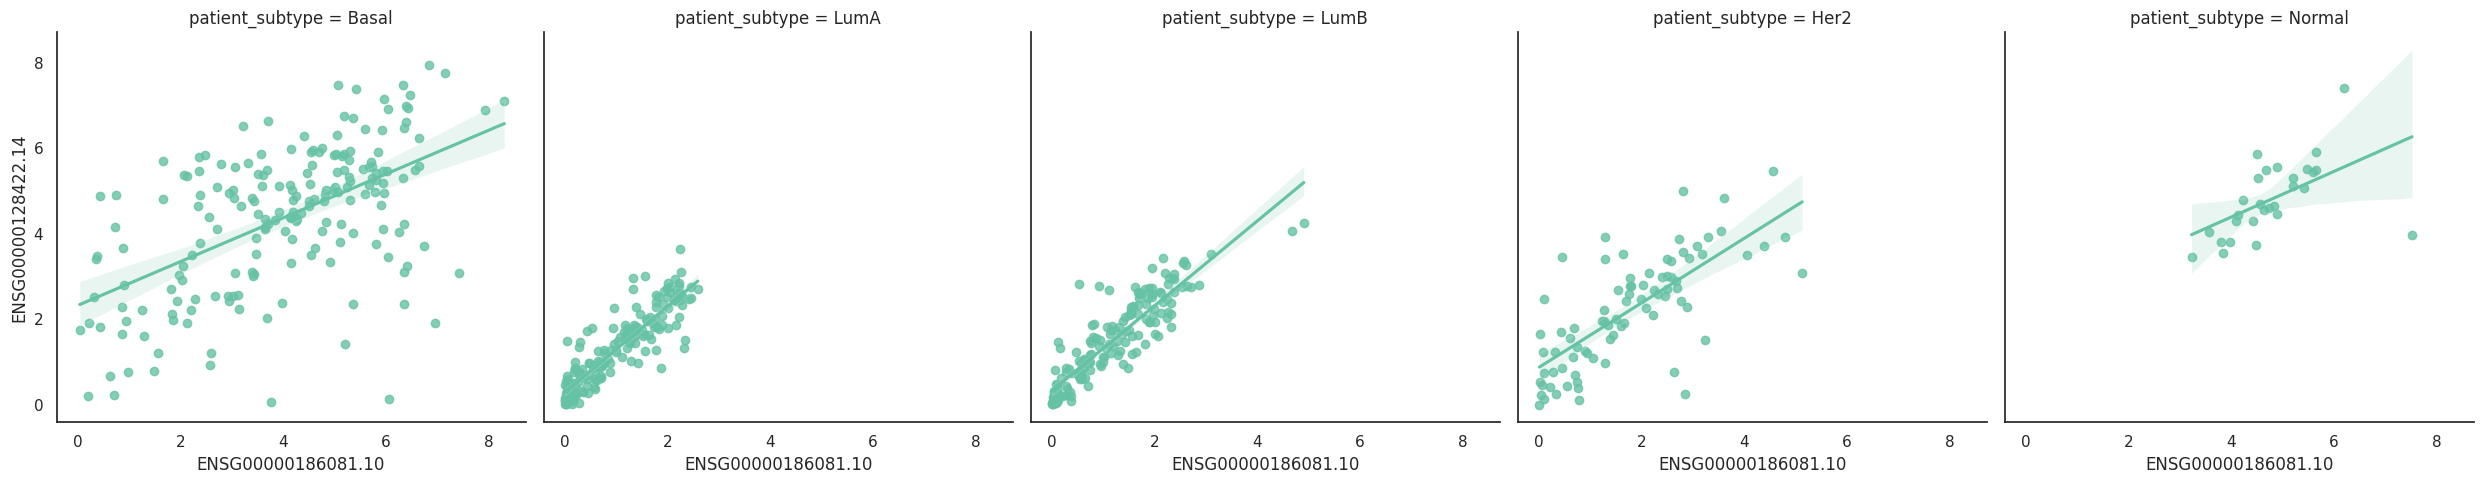

In [65]:
### Compare the expression of these two genes: are they corrolated based on tumor subtypes?
### To answer this question, make a graph and calcute correlation coefficients. 
### Briefly describe your results.
sns.lmplot(data, x="ENSG00000186081.10", y="ENSG00000128422.14", col="patient_subtype")
sns.despine()

data_basal = data.loc[data.patient_subtype == "Basal", ["ENSG00000186081.10","ENSG00000128422.14"]]
data_lumA = data.loc[data.patient_subtype == "LumA", ["ENSG00000186081.10","ENSG00000128422.14"]]
data_lumB = data.loc[data.patient_subtype == "LumB", ["ENSG00000186081.10","ENSG00000128422.14"]]
data_Her2 = data.loc[data.patient_subtype == "Her2", ["ENSG00000186081.10","ENSG00000128422.14"]]
data_normal = data.loc[data.patient_subtype == "Normal", ["ENSG00000186081.10","ENSG00000128422.14"]]

print ("Basal", sp.stats.spearmanr(data_basal).statistic)
print ("LumA", sp.stats.spearmanr(data_lumA).statistic)
print ("LumB", sp.stats.spearmanr(data_lumB).statistic)
print ("Her2", sp.stats.spearmanr(data_Her2).statistic)
print ("Normal", sp.stats.spearmanr(data_normal).statistic)

On observe que pour tous les sous-types de cancers du sein, la p-valeur est supérieure à 0.5 sauf pour le sous-type basal. Ceci a l'air d'être confirmé avec nos graphiques. On peut en déduire que les deux gènes avec le plus grand écart type pour tous les patients sont corrêlés positivement. 

## Clustering [20 pts]
You are wondering if the M genes considered by your dataset are enough to cluster the N patients by their cancer subtype.

In [82]:
### Apply the k-means alogirthm to your dataset
kmean_algo = sklearn.cluster.KMeans(n_clusters=5, n_init="auto")
kmeans_subset = kmean_algo.fit(patient_expression)
#print(kmeans_subset.cluster_centers_) 
cent_by_axes = kmeans_subset.cluster_centers_.T 
#print(cent_by_axes)
kmeans_subset.labels_
data["kmeans"]=kmeans_subset.labels_
data.head()

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,patient_subtype,kmeans
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal,1
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal,2
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal,2
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal,2
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal,2


In [ ]:
### What value of k did you use and why?

J'ai utilisé k=5 car il y a 5 sous-types de cancers du sein.

In [92]:
### Were you able to cluster the patients by cancer subtypes, while considering the expressions of the M genes?
data.loc[:,["patient_subtype","kmeans"]].value_counts()

patient_subtype  kmeans
LumA             4         170
LumB             0         165
Basal            2         126
Her2             3          82
Basal            1          65
Normal           1          25
LumA             0           8
                 3           1
Normal           0           1
                 3           1
                 4           1
Name: count, dtype: int64

On constate que les gènes M pris en compte par notre ensemble de données sont suffisants pour regrouper les patients N selon leur sous-type de cancer. On observe tout de même que les clusters formés sous-divises les sous-types de cancer suivant : LumA (3 clusters), Normal (4 clusters) et Basal (2 clusters). Cette méthodologie permet donc bien la formation de sous-groupe à partir de l'expression des différents gènes et ces sous-groupes reforment les groupes de patients triés par sous-types de cancer.